In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px 
from sklearn.preprocessing import LabelEncoder

# Data Loading and Exploration

In [28]:
# Reading the dataset from a CSV file
music_data = pd.read_csv('dataset.csv', skipinitialspace=True)
music_data


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [29]:
# Displaying the first 5 rows of the dataset
music_data.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [30]:
# Inspect the descriptive statistics of the dataset including count, mean, standard deviation, min, max, and quartile values for numeric columns
music_data.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [31]:
# Retrieve the list of column names from the dataset and convert into a Python list for easier inspection
music_data.columns.tolist()


['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [32]:
# Removing the first 5 columns using slicing.
music_data = music_data.iloc[:, 5:]

# Displaying the updated dataset to verify the selected columns
music_data


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [33]:
# Checking the data types of columns in the dataset
music_data.dtypes


popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [34]:
# Checking for missing values in the dataset
music_data.isnull().sum()


popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Since there are no missing values in the dataset, there is no need to impute for missing values

# Visualization of dataset

In [35]:
# Selecting the top 100 tracks based on the 'popularity' column
popular_genres = music_data.nlargest(100, 'popularity')

# Creating a grouped bar chart using Plotly Express to visualize track characteristics
fig = px.bar(
    popular_genres, 
    x='track_genre', 
    y=['valence', 'energy', 'danceability', 'acousticness'], 
    barmode='group'
)

# Displaying the interactive bar chart
fig.show()


C:\Users\ktpro\AppData\Local\Temp\ipykernel_26908\2340517090.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




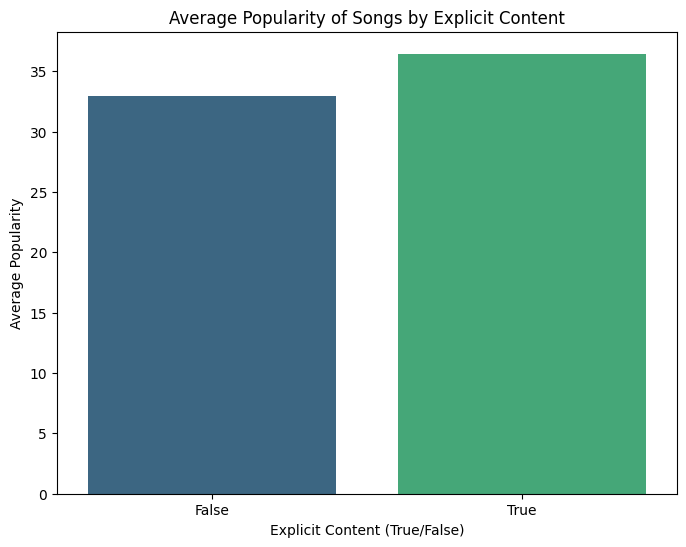

In [36]:
explicit_popularity = music_data.groupby('explicit')['popularity'].mean().reset_index()

# Creating a bar plot to visualize the relationship between explicit content and average popularity
plt.figure(figsize=(8, 6))
sns.barplot(data=explicit_popularity, x='explicit', y='popularity', palette='viridis')


plt.title('Average Popularity of Songs by Explicit Content')
plt.xlabel('Explicit Content (True/False)')
plt.ylabel('Average Popularity')


plt.show()


C:\Users\ktpro\AppData\Local\Temp\ipykernel_26908\258784308.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




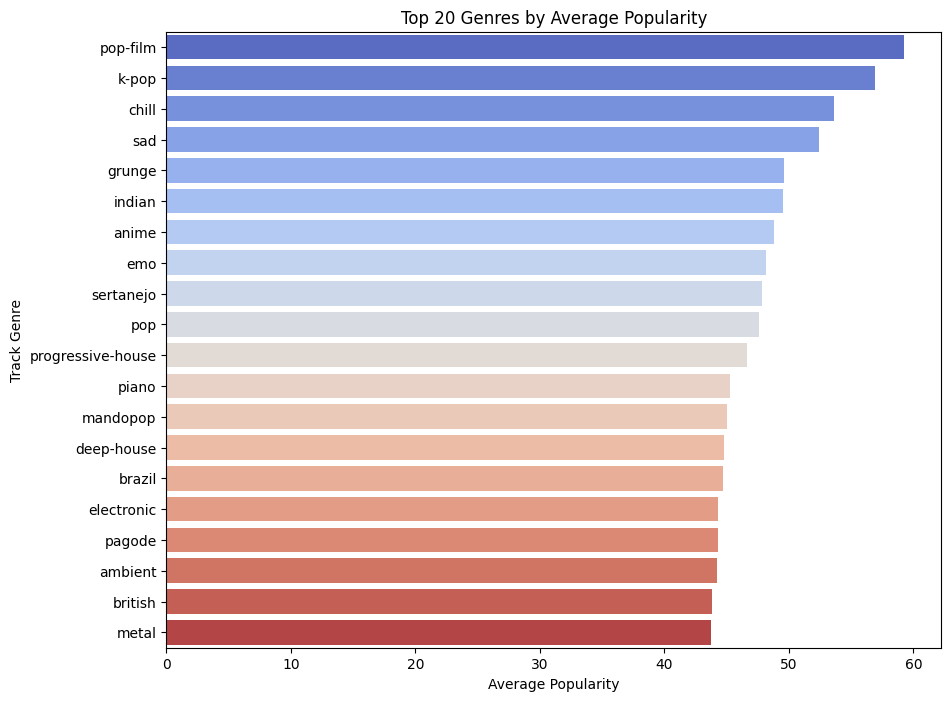

In [37]:
top_genres = music_data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20).reset_index()

# Creating a horizontal bar plot to visualize the top 20 genres by average popularity
plt.figure(figsize=(10, 8))
sns.barplot(data=top_genres, x='popularity', y='track_genre', palette='coolwarm')

plt.title('Top 20 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')

plt.show()


In [38]:
#Columns to be encoded
categorical_features=['explicit', 'track_genre']

music_data_copy = music_data.copy()

#Encode categorical features
labelencode = LabelEncoder()
for feature in categorical_features:
    music_data_copy[feature] = labelencode.fit_transform(music_data_copy[feature])

In [39]:
music_data_copy

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [40]:
music_data_copy.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,56.500000
std,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,32.907844
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,28.000000
50%,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.500000
75%,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [41]:
music_data_copy.dtypes

popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre           int64
dtype: object

In [42]:
#Splitting dataset into independent and dependent
music_x = music_data_copy.drop(columns=['popularity'])
music_y=  music_data_copy['popularity']

In [43]:
# Calculating the correlation between each feature in music_x and the target variable music_y
correlation_matrix = music_x.corrwith(music_y)

# Sorting the correlation values in descending order and taking the absolute value to focus on the strength of the correlation
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

important_features = sorted_correlations[sorted_correlations >= 0].index


In [44]:
important_features

Index(['instrumentalness', 'loudness', 'speechiness', 'explicit', 'valence',
       'danceability', 'track_genre', 'time_signature', 'acousticness', 'mode',
       'tempo', 'duration_ms', 'liveness', 'key', 'energy'],
      dtype='object')

C:\Users\ktpro\AppData\Local\Temp\ipykernel_26908\2978405234.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




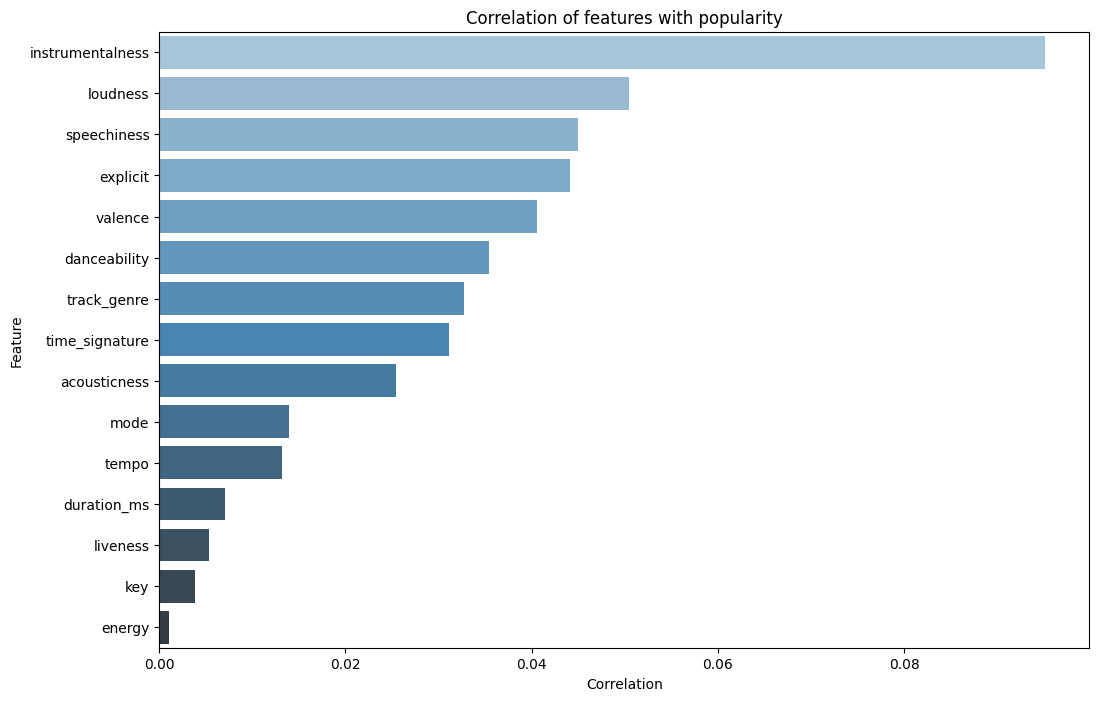

In [45]:
# Visualize the top correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_correlations, y=sorted_correlations.index, palette="Blues_d")
plt.title("Correlation of features with popularity")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [46]:
feature_subsets = music_x[important_features]

#scaling the independent variable
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(feature_subsets)


scaled_df = pd.DataFrame(scaled_features, columns=important_features)

scaled_df.reset_index(drop=True, inplace=True)
music_y.reset_index(drop=True, inplace=True)

# Combine scaled features with the dependent variable
final_data = pd.concat([scaled_df, music_y],axis = 1)

X =  final_data.drop(columns=['popularity'])
y = final_data['popularity']


In [47]:
final_data

,instrumentalness,loudness,speechiness,explicit,valence,danceability,track_genre,time_signature,acousticness,mode,tempo,duration_ms,liveness,key,energy,popularity
0,0.000001,0.791392,0.148187,0.0,0.718593,0.686294,0.0,0.8,0.032329,0.0,0.361245,0.044043,0.3580,0.090909,0.4610,73
1,0.000006,0.597377,0.079067,0.0,0.268342,0.426396,0.0,0.8,0.927711,1.0,0.318397,0.028566,0.1010,0.090909,0.1660,55
2,0.000000,0.736123,0.057720,0.0,0.120603,0.444670,0.0,0.8,0.210843,1.0,0.313643,0.040255,0.1170,0.000000,0.3590,57
3,0.000071,0.573701,0.037617,0.0,0.143719,0.270051,0.0,0.6,0.908635,1.0,0.746758,0.038557,0.1320,0.000000,0.0596,71
4,0.000000,0.737103,0.054508,0.0,0.167839,0.627411,0.0,0.8,0.470884,1.0,0.492863,0.037969,0.0829,0.181818,0.4430,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.928000,0.612952,0.043731,0.0,0.034070,0.174619,1.0,1.0,0.642570,1.0,0.517705,0.073511,0.0863,0.454545,0.2350,21
113996,0.976000,0.577345,0.041554,0.0,0.035176,0.176650,1.0,0.8,0.997992,0.0,0.350242,0.073511,0.1050,0.000000,0.1170,22
113997,0.000000,0.714648,0.043523,0.0,0.746734,0.638579,1.0,0.8,0.870482,0.0,0.543933,0.051833,0.0839,0.000000,0.3290,22
113998,0.000000,0.714759,0.030777,0.0,0.415075,0.595939,1.0,0.8,0.382530,1.0,0.558651,0.054206,0.2700,0.636364,0.5060,41


In [48]:
#Splitting Dataset into training and testing with a 80-20 proportion.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_test

113186    50
42819     11
59311      0
91368      0
61000     57
          ..
91204     75
102335     0
107757    50
86528     42
86389     44
Name: popularity, Length: 22800, dtype: int64

In [50]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=15, min_samples_split=15, learning_rate=0.05)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=15,
                          min_samples_split=15, n_estimators=500,
                          random_state=42)

In [52]:
params = {'n_estimators': 1000, 'max_depth': 15, 'min_samples_split': 15,
          'learning_rate': 0.05, 'loss': 'squared_error'}
improved_gbr = GradientBoostingRegressor(**params)

improved_gbr.fit(X_train, y_train)



KeyboardInterrupt: 

In [29]:
ensemble = VotingRegressor(estimators=[
    ('improved_gbr', improved_gbr),
    ('rf_model', rf_model),
])

ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('improved_gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=15,
                                                       min_samples_split=15,
                                                       n_estimators=1000)),
                            ('rf_model',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=42))])

# Testing and Evluation using second dataset

In [30]:
score = rf_model.score(X, y)


# Make predictions using the random forest model
y_pred_22 = rf_model.predict(X)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y, y_pred_22)

print("RMSE: %.4f"  % np.sqrt(mse))
print("size of prediction: ", len(rf_model.predict(X)))
print("prediction: \n", rf_model.predict(X))
print("test score: {0:.4f}\n".format(score))

MSE: 9.1134
size of prediction:  114000
prediction: 
 [59.43 49.21 53.01 ... 24.64 41.39 24.26]
test score: 0.8331



In [31]:
score = gb_model.score(X, y)


# Make predictions using the gradient boosting model
y_pred_22 = gb_model.predict(X)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y, y_pred_22)

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(gb_model.predict(X)))
print("prediction: \n", gb_model.predict(X))
print("test score: {0:.4f}\n".format(score))

MSE: 7.8583
size of prediction:  114000
prediction: 
 [71.22477822 54.36718564 55.23665418 ... 22.67706045 43.55768175
 25.03964201]
test score: 0.8759



In [32]:
score = improved_gbr.score(X, y)

# calculate the Mean Squared Error
mse = mean_squared_error(y, improved_gbr.predict(X))

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(improved_gbr.predict(X)))
print("prediction: \n", improved_gbr.predict(X))
print("test score: {0:.4f}\n".format(score))

MSE: 7.3953
size of prediction:  114000
prediction: 
 [72.82465383 54.9085902  56.91099707 ... 21.75701921 41.25590619
 22.44642311]
test score: 0.8901



In [33]:
score = ensemble.score(X, y)


# Make predictions using the ensemble model
y_pred_22 = ensemble.predict(X)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y, y_pred_22)

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(ensemble.predict(X)))
print("prediction: \n", ensemble.predict(X))
print("test score: {0:.4f}\n".format(score))

RMSE: 7.9004
size of prediction:  114000
prediction: 
 [66.21849726 52.20061238 55.04095665 ... 23.24760023 41.00458958
 23.40096413]
test score: 0.8745

